# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [134]:
# stundent details example: John S. 9812
#                       student details 1: Ilana L. 9077
# (if exists)           student details 2: Alina N. 1810
# (if exists)           student details 3: Or R. 6169

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGpt 
Goal: Assist in analyzing wine data, provide quality predictions, and explain insights from different models.

Propmpt1: Predict the quality of a wine based on specific input features.
    
Propmpt2: Explain in simple terms how my model makes decisions.
    
Propmpt3: Analyze the wine dataset and summarize the key features that influence wine quality.


AI agent name 2: GrokAI  
Goal: Provide deep code understanding, generate Python code snippets, and assist with complex programming tasks.

Propmpt1: Suggest and explain suitable machine learning algorithms.
    
Propmpt2: Support with data visualization.
    
Propmpt3: Identify potential bugs or inefficiencies.

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

The assignment focuses on the supervised classification in machine learning.
* We aim to predict the category of samples based on given features.
* In this assignment, we use the wine dataset, which includes 13 chemical attributes of wine, and a target that represents one of 3 wine types (0,1 or 2).
* The assignment involves performing preprocessing, feature engineering, training models and tuning hyperparameters using 5 fold cross validation.
* And finally we predict classes on the pre split test set while evaluating model performance with the macro average F1 score.

#### Add information in this Markdown cell (double click to change, shift-enter to view)


## Part 2 - Initial Preparations 
You could add as many code cells as needed

### Loading:

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [136]:
# Loading the dataset's train and test data::
path = "./wine_train.csv"
train_data = pd.read_csv(path)

path = "./wine_test.csv"
test_data = pd.read_csv(path)

# Display 5 first elements of train and test
display(train_data.head(5))
display(test_data.head(5))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


### EDA:

#### Display wine dataset correlations and plot a scatterplot between two columns with positive correlation

In [137]:
display(train_data.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


##### We can see that Alcohol and Proline has a positive correlation, lets show it in a scatterplot:

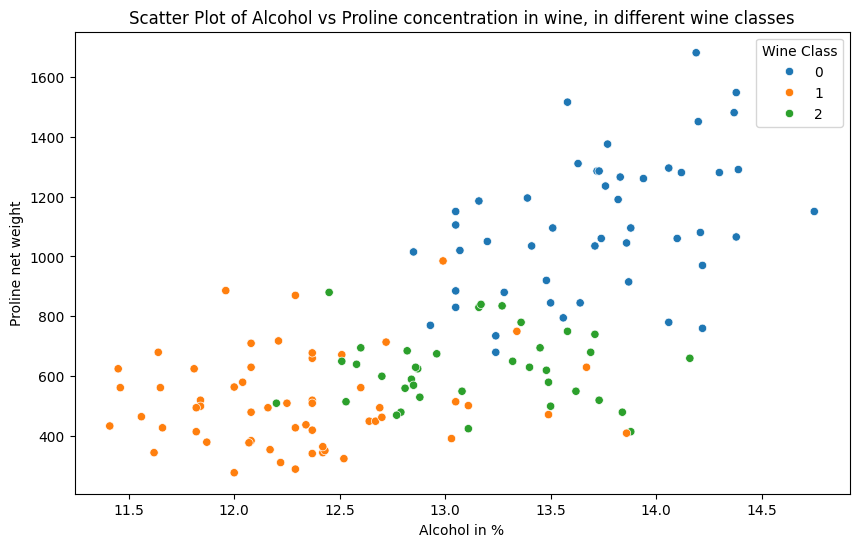

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='proline', hue='target', data=train_data, palette='tab10')
plt.title('Scatter Plot of Alcohol vs Proline concentration in wine, in different wine classes')
plt.xlabel('Alcohol in %')
plt.ylabel('Proline net weight')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the alcohol percentage in wine usually indicates a different wine class

#### General info about the dataset

In [139]:
display(train_data.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


##### We can see that the alcohol concentration is distributed between 11.41% to 14.75%, lets make a histogram with the alcohol's distribution:

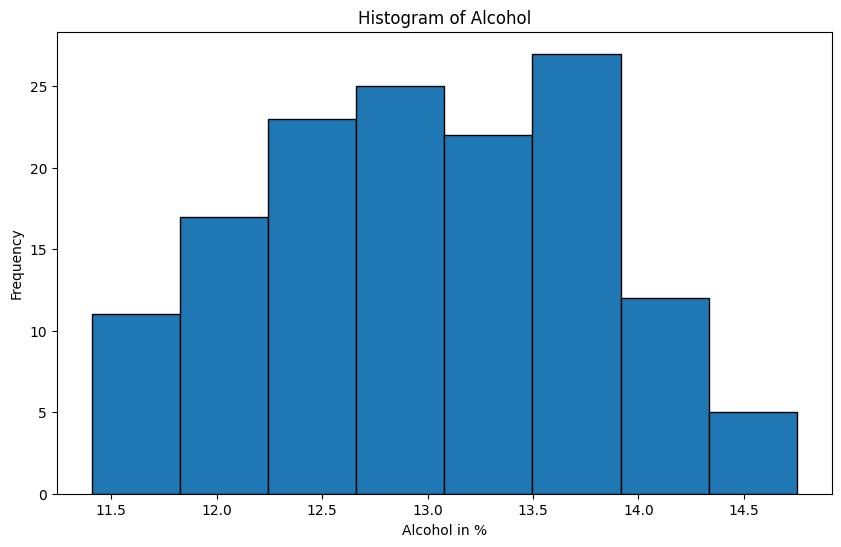

In [140]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['alcohol'], bins=8, edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol in %')
plt.ylabel('Frequency')
plt.show()

##### It's easy to see that most of the wine's alcohol percentage is around 13%

#### Pie chart visualization of wine category distribution in training data

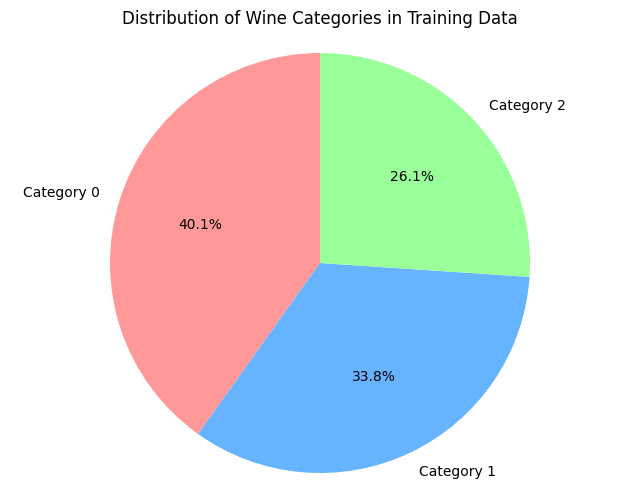

In [141]:
# Load the training data
train_data = pd.read_csv("./wine_train.csv")

# Count the occurrences of each target category
category_counts = train_data['target'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=['Category 0', 'Category 1', 'Category 2'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Wine Categories in Training Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Save the pie chart to a file
plt.savefig('wine_category_pie_chart.png')

### Feature Engineering:

#### Principal Component Analysis on wine dataset while using scaled VS non scaled data

##### Separate features and target

In [142]:
features = train_data.drop('target', axis=1)
target = train_data['target']

##### Standardize the data

In [143]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##### Perform PCA on scaled and non scaled features

In [144]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)
principal_components_scaled = pca.fit_transform(scaled_features)

##### Create a DataFrame with the scaled and non scaled principal components for comparison

In [145]:
# Non Scaled:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = target
# Scaled:
pca_scaled_df = pd.DataFrame(data=principal_components_scaled, columns=['PC1', 'PC2'])
pca_scaled_df['target'] = target

##### Plot the scaled and non scaled analysis

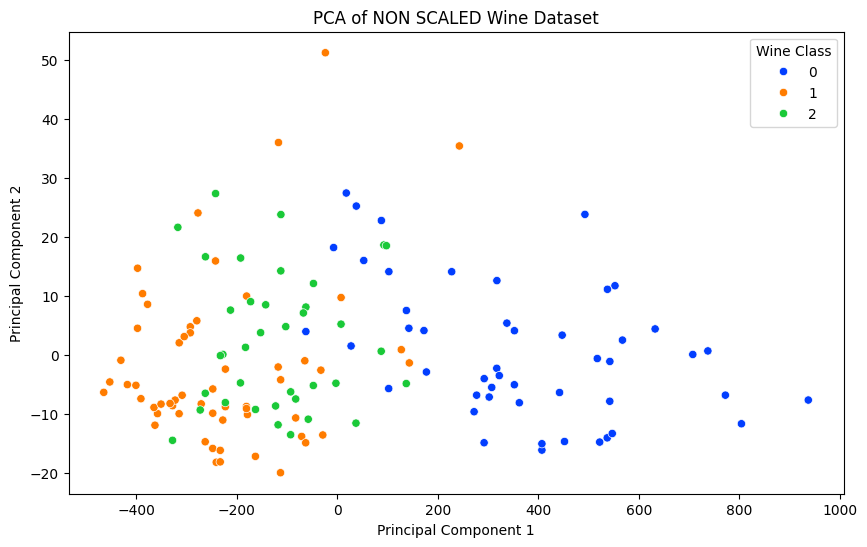

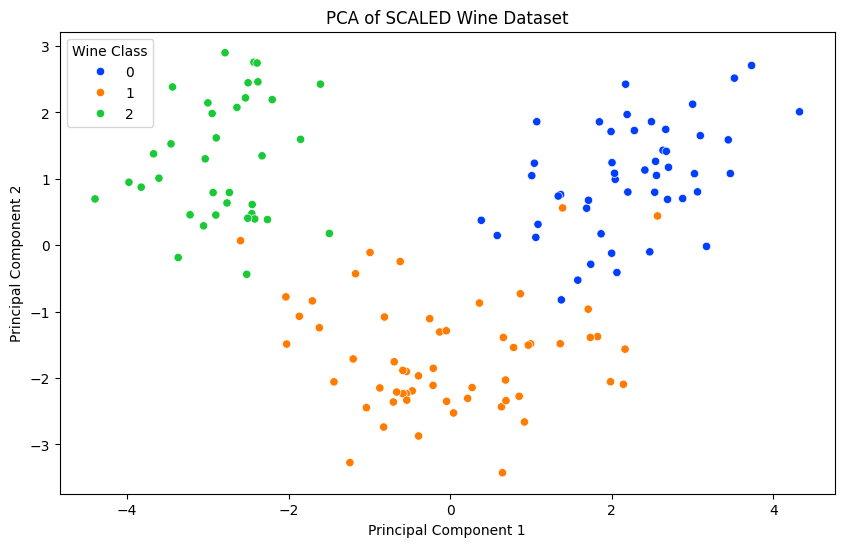

In [146]:
# PCA non scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='bright')
plt.title('PCA of NON SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

# PCA scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_scaled_df, palette='bright')
plt.title('PCA of SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the scaled information is separated mostly evenly between 3 of the wine classes (the target) in the SCALED analysis

## Part 3 - Experiments
You could add as many code cells as needed

##### In this section, we will run experiments on the wine dataset to find the best combination of feature engineering, model, and hyperparameters. Using 5-fold cross-validation and grid search, we’ll tune KNN and Decision Tree, testing StandardScaler and PCA, and evaluate with the macro-average F1 score.

In [147]:
# Separate features and target for training data
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Define a custom scorer for macro-average F1
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Dictionary to store experiment results
results = []

#### Experiment 1: KNN with StandardScaler only (no PCA)

##### Separate features and target for training data


In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Define parameter grid for KNN


In [149]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

##### Perform grid search with 5-fold cross-validation for KNN

In [150]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=macro_f1_scorer)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

##### Store the best results for KNN (StandardScaler only)

In [151]:
results.append({
    'Model': 'KNN',
    'Feature Engineering': 'StandardScaler',
    'Best Parameters': knn_grid.best_params_,
    'Best Macro F1 Score': knn_grid.best_score_
})

#### Experiment 2: KNN with StandardScaler and PCA

In [152]:
for n_components in [2, 5, 8]:
    # Apply PCA after scaling
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Perform grid search with 5-fold cross-validation for KNN with PCA
    knn_pca_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=macro_f1_scorer)
    knn_pca_grid.fit(X_train_pca, y_train)

    # Store the best results for KNN with PCA
    results.append({
        'Model': 'KNN',
        'Feature Engineering': f'StandardScaler + PCA ({n_components} components)',
        'Best Parameters': knn_pca_grid.best_params_,
        'Best Macro F1 Score': knn_pca_grid.best_score_
    })

#### Experiment 3: Decision Tree with StandardScaler only (no PCA)

##### Define parameter grid for Decision Tree

In [153]:
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

##### Perform grid search with 5-fold cross-validation for Decision Tree

In [154]:
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring=macro_f1_scorer)
dt_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

##### Store the best results for Decision Tree (StandardScaler only)

In [155]:
results.append({
    'Model': 'Decision Tree',
    'Feature Engineering': 'StandardScaler',
    'Best Parameters': dt_grid.best_params_,
    'Best Macro F1 Score': dt_grid.best_score_
})

#### Experiment 4: Decision Tree with StandardScaler and PCA

In [156]:
for n_components in [2, 5, 8]:
    # Apply PCA after scaling
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Perform grid search with 5-fold cross-validation for Decision Tree with PCA
    dt_pca_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring=macro_f1_scorer)
    dt_pca_grid.fit(X_train_pca, y_train)

    # Store the best results for Decision Tree with PCA
    results.append({
        'Model': 'Decision Tree',
        'Feature Engineering': f'StandardScaler + PCA ({n_components} components)',
        'Best Parameters': dt_pca_grid.best_params_,
        'Best Macro F1 Score': dt_pca_grid.best_score_
    })

##### Create a DataFrame to summarize the results

In [157]:
results_df = pd.DataFrame(results)

##### Display the results

In [158]:
print("Summary of Experiment Results:")
display(results_df)

Summary of Experiment Results:


,Model,Feature Engineering,Best Parameters,Best Macro F1 Score
0,KNN,StandardScaler,"{'metric': 'manhattan', 'n_neighbors': 9}",0.978968
1,KNN,StandardScaler + PCA (2 components),"{'metric': 'euclidean', 'n_neighbors': 5}",0.972852
2,KNN,StandardScaler + PCA (5 components),"{'metric': 'euclidean', 'n_neighbors': 7}",0.972294
3,KNN,StandardScaler + PCA (8 components),"{'metric': 'manhattan', 'n_neighbors': 5}",0.965936
4,Decision Tree,StandardScaler,"{'max_depth': 5, 'min_samples_split': 5}",0.879010
5,Decision Tree,StandardScaler + PCA (2 components),"{'max_depth': 3, 'min_samples_split': 5}",0.938757
6,Decision Tree,StandardScaler + PCA (5 components),"{'max_depth': 3, 'min_samples_split': 2}",0.933678
7,Decision Tree,StandardScaler + PCA (8 components),"{'max_depth': 5, 'min_samples_split': 5}",0.940757


##### Identify the best combination

In [159]:
best_result = results_df.loc[results_df['Best Macro F1 Score'].idxmax()]
print("\nBest Combination:")
print(f"Model: {best_result['Model']}")
print(f"Feature Engineering: {best_result['Feature Engineering']}")
print(f"Best Parameters: {best_result['Best Parameters']}")
print(f"Best Macro F1 Score: {best_result['Best Macro F1 Score']:.4f}")


Best Combination:
Model: KNN
Feature Engineering: StandardScaler
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best Macro F1 Score: 0.9790


##### The best wine classification model is KNN with StandardScaler, using 'manhattan' distance and 9 neighbors, achieving a 0.9790 macro-average F1 score. This indicates high accuracy and balance, suggesting the original features are sufficient without PCA, with validation on the test set as the next step.

## Part 4 + 5 - Training + Apply on test and show model performance estimation
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

#### Train the best model with selected parameters

In [160]:
knn_best_params = best_result['Best Parameters']
knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

#### Predict and evaluate on the test set

##### Prepare the test set (same feature engineering as training set!)

In [161]:
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

##### Scale (using the same scaler from training)

In [162]:
X_test_scaled = scaler.transform(X_test)

##### Prediction

In [163]:
y_pred = knn_best_model.predict(X_test_scaled)

##### Evaluation

In [164]:
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



##### Visualization – Confusion Matrix

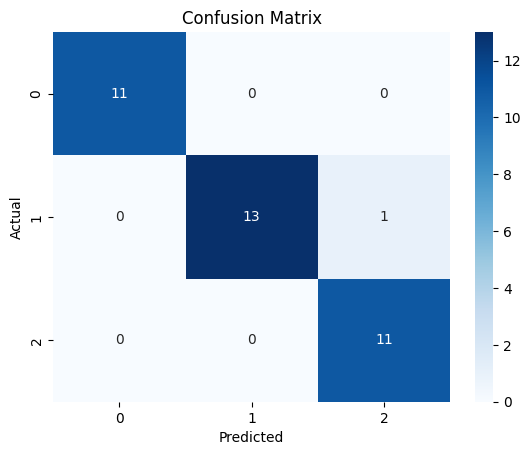

In [165]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### The selected model for prediction is KNN with only data normalization (no PCA). The model was trained with n_neighbors=9 and the manhattan distance metric. On the test set, the model achieved a high and balanced F1 score, reinforcing the conclusion that the original scaled data contains sufficient information for accurate wine classification.